### Problem TanÄ±mÄ±

- **SeÃ§ilen Veri Seti:** Student Performance
  - Bu veri seti, Portekiz'deki iki farklÄ± derste (Matematik ve Portekizce) eÄŸitim gÃ¶ren Ã¶ÄŸrencilerin demografik, sosyal ve okul ile ilgili bilgilerini iÃ§ermektedir.
- **Problemin AmacÄ±:** Ã–ÄŸrencilerin yÄ±l sonu notlarÄ±nÄ± (G3) tahmin etmek.
- **Ä°ki veri kÃ¼mesi:** student-mat.csv (Matematik) ve
student-por.csv (Portekizce)    
- **BirleÅŸtirildi:** df â†’ TÃ¼m Ã¶ÄŸrenciler + ders tÃ¼rÃ¼ bilgisi
- **Hedef DeÄŸiÅŸken:** G3(YÄ±l sonu notu)
- **Problemin AmacÄ±:**
Ã–ÄŸrencilerin yÄ±l sonu baÅŸarÄ± notu olan G3 deÄŸiÅŸkenini, diÄŸer deÄŸiÅŸkenlere dayanarak tahmin etmeyi amaÃ§layan bir regresyon problemi ele alÄ±nmaktadÄ±r.
- **Pratikteki Ã–nemi:**
   - Ã–ÄŸrencilerin dÃ¼ÅŸÃ¼k baÅŸarÄ± risklerini Ã¶nceden tahmin ederek eÄŸitimde erken mÃ¼dahale saÄŸlanabilir.
   - Ã–ÄŸrencilerin baÅŸarÄ±sÄ±nÄ± etkileyen faktÃ¶rleri analiz ederek Ã¶ÄŸretmen ve yÃ¶neticilere destek saÄŸlar.
   - EÄŸitim politikalarÄ± ve kiÅŸiselleÅŸtirilmiÅŸ Ã¶ÄŸrenme planlarÄ± geliÅŸtirilebilir.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df_mat = pd.read_csv('/content/drive/MyDrive/student-mat.csv',  sep=';')
df_por = pd.read_csv('/content/drive/MyDrive/student-por.csv',  sep=';')

# Ders tÃ¼rÃ¼ bilgisi ekle
df_mat['course'] = 'Math'
df_por['course'] = 'Portuguese'

# BirleÅŸtir
df = pd.concat([df_mat, df_por], ignore_index=True)

### Veri Analizi ve GÃ¶rselleÅŸtirme


In [ ]:
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0        GP   F   18       U     GT3       A     4     4   at_home   teacher   
1        GP   F   17       U     GT3       T     1     1   at_home     other   
2        GP   F   15       U     LE3       T     1     1   at_home     other   
3        GP   F   15       U     GT3       T     4     2    health  services   
4        GP   F   16       U     GT3       T     3     3     other     other   
...     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
1039     MS   F   19       R     GT3       T     2     3  services     other   
1040     MS   F   18       U     LE3       T     3     1   teacher  services   
1041     MS   F   18       U     GT3       T     1     1     other     other   
1042     MS   M   17       U     LE3       T     3     1  services  services   
1043     MS   M   18       R     LE3       T     3     2  services     other   

      ... freetime goout  Dalc  Walc  health absences  G1  G2  G3      course  
0     ...        3     4     1     1       3        6   5   6   6        Math  
1     ...        3     3     1     1       3        4   5   5   6        Math  
2     ...        3     2     2     3       3       10   7   8  10        Math  
3     ...        2     2     1     1       5        2  15  14  15        Math  
4     ...        3     2     1     2       5        4   6  10  10        Math  
...   ...      ...   ...   ...   ...     ...      ...  ..  ..  ..         ...  
1039  ...        4     2     1     2       5        4  10  11  10  Portuguese  
1040  ...        3     4     1     1       1        4  15  15  16  Portuguese  
1041  ...        1     1     1     1       5        6  11  12   9  Portuguese  
1042  ...        4     5     3     4       2        6  10  10  10  Portuguese  
1043  ...        4     1     3     4       5        4  10  11  11  Portuguese  

[1044 rows x 34 columns]

In [ ]:
# Ä°lk 5 satÄ±rÄ± gÃ¶relim
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 course  
0        3     4     1     1       3        6   5   6   6   Math  
1        3     3     1     1       3        4   5   5   6   Math  
2        3     2     2     3       3       10   7   8  10   Math  
3        2     2     1     1       5        2  15  14  15   Math  
4        3     2     1     2       5        4   6  10  10   Math  

[5 rows x 34 columns]

In [ ]:
# Veri seti genel bilgileri
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [ ]:
df.shape

(1044, 34)

 Veri Seti YapÄ±sÄ±
Toplam gÃ¶zlem sayÄ±sÄ±: 1044 Ã¶ÄŸrenci

Toplam Ã¶zellik (sÃ¼tun) sayÄ±sÄ±: 34

16 tanesi sayÄ±sal, 18 tanesi kategorik veri tÃ¼rÃ¼nde

In [ ]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'course'],
      dtype='object')




| DeÄŸiÅŸken       | AÃ§Ä±klama                                                                                   |
| -------------- | ------------------------------------------------------------------------------------------ |
| **school**     | Ã–ÄŸrencinin okulu (ikili: "GP" veya "MS")                                                   |
| **sex**        | Ã–ÄŸrencinin cinsiyeti (ikili: "F" - kadÄ±n, "M" - erkek)                                     |
| **age**        | Ã–ÄŸrencinin yaÅŸÄ± (sayÄ±sal: 15 ile 22 arasÄ±)                                                 |
| **address**    | Ã–ÄŸrencinin ev adresi tipi (ikili: "U" - ÅŸehir, "R" - kÄ±rsal)                               |
| **famsize**    | Aile bÃ¼yÃ¼klÃ¼ÄŸÃ¼ (ikili: "LE3" - 3 veya daha az, "GT3" - 3'ten fazla)                        |
| **Pstatus**    | Ebeveynlerin birlikte yaÅŸama durumu (ikili: "T" - birlikte, "A" - ayrÄ±)                    |
| **Medu**       | Annenin eÄŸitim dÃ¼zeyi (0-4 arasÄ±; 0: yok, 1: ilkokul, 2: ortaokul, 3: lise, 4: Ã¼niversite) |
| **Fedu**       | BabanÄ±n eÄŸitim dÃ¼zeyi (0-4 arasÄ±; aynÄ± Medu gibi)                                          |
| **Mjob**       | Annenin mesleÄŸi ("teacher", "health", "services", "at\_home", "other")                     |
| **Fjob**       | BabanÄ±n mesleÄŸi (aynÄ± kategoriler)                                                         |
| **reason**     | Okul seÃ§me nedeni ("home", "reputation", "course", "other")                                |
| **guardian**   | Yasal veli ("mother", "father", "other")                                                   |
| **traveltime** | Evden okula gidiÅŸ sÃ¼resi (1: <15 dk, 2: 15-30 dk, 3: 30-60 dk, 4: >1 saat)                 |
| **studytime**  | HaftalÄ±k ders Ã§alÄ±ÅŸma sÃ¼resi (1: <2 saat, 2: 2-5 saat, 3: 5-10 saat, 4: >10 saat)          |
| **failures**   | GeÃ§miÅŸ sÄ±nÄ±f tekrarÄ± sayÄ±sÄ± (1 â‰¤ n < 3 ise n, 3 veya Ã¼zeri ise 4)                          |
| **schoolsup**  | Okuldan ek eÄŸitim desteÄŸi (yes/no)                                                         |
| **famsup**     | Aileden eÄŸitim desteÄŸi (yes/no)                                                            |
| **paid**       | Ãœcretli ek ders alÄ±mÄ± (yes/no)                                                             |
| **activities** | Ders dÄ±ÅŸÄ± etkinliklere katÄ±lÄ±m (yes/no)                                                    |
| **nursery**    | Anaokuluna gitmiÅŸ olma durumu (yes/no)                                                     |
| **higher**     | YÃ¼ksek Ã¶ÄŸrenim isteÄŸi (yes/no)                                                             |
| **internet**   | Evde internet eriÅŸimi (yes/no)                                                             |
| **romantic**   | Romantik iliÅŸki durumu (yes/no)                                                            |
| **famrel**     | Aile iliÅŸkilerinin kalitesi (1: Ã§ok kÃ¶tÃ¼, 5: Ã§ok iyi)                                      |
| **freetime**   | Okul sonrasÄ± serbest zaman (1-5 arasÄ±)                                                     |
| **goout**      | ArkadaÅŸlarla dÄ±ÅŸarÄ± Ã§Ä±kma sÄ±klÄ±ÄŸÄ± (1-5 arasÄ±)                                              |
| **Dalc**       | Hafta iÃ§i alkol tÃ¼ketimi (1-5 arasÄ±)                                                       |
| **Walc**       | Hafta sonu alkol tÃ¼ketimi (1-5 arasÄ±)                                                      |
| **health**     | Mevcut saÄŸlÄ±k durumu (1: Ã§ok kÃ¶tÃ¼, 5: Ã§ok iyi)                                             |
| **absences**   | DevamsÄ±zlÄ±k sayÄ±sÄ± (0-93 arasÄ±)                                                            |
| **G1**         | 1. dÃ¶nem notu                                                                              |
| **G2**         | 2. dÃ¶nem notu                                                                              |
| **G3**         | 3. dÃ¶nem (final) notu (**Hedef deÄŸiÅŸken**)                                                 |
| **course**     | Ders tÃ¼rÃ¼ ("Math": Matematik, "Portuguese": Portekizce)                                    |


In [ ]:
# SayÄ±sal sÃ¼tunlarÄ±n Ã¶zet istatistikleri
print(df.describe())

               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1

 SayÄ±sal DeÄŸiÅŸkenler Ä°Ã§in Genel DeÄŸerler
G3 (Final Grade): Ortalama â‰ˆ 11.34, Minimum: 0, Maksimum: 20

absences: BazÄ± Ã¶ÄŸrencilerde Ã§ok yÃ¼ksek devamsÄ±zlÄ±k var (maks: 75). Bu aykÄ±rÄ± deÄŸer olabilir.

G1 ve G2: G3 ile iliÅŸkili Ã¶n notlar; ortalamalarÄ± â‰ˆ 11 civarÄ±nda.

In [ ]:
# Eksik veri var mÄ±?
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
course        0
dtype: int64


In [ ]:
df['G3'].value_counts()

G3
10    153
11    151
13    113
12    103
14     90
15     82
8      67
9      63
0      53
16     52
17     35
18     27
7      19
6      18
5       8
19      7
20      1
4       1
1       1
Name: count, dtype: int64

### GÃ¶rselleÅŸtirme

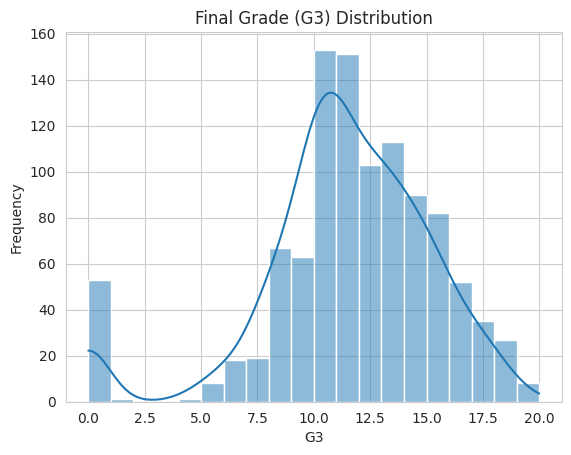

In [ ]:
# Hedef DeÄŸiÅŸken G3'Ã¼n DaÄŸÄ±lÄ±mÄ±:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Final Grade (G3) Distribution')
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.show()

G3 daÄŸÄ±lÄ±mÄ± biraz saÄŸa Ã§arpÄ±k, yani dÃ¼ÅŸÃ¼k not alan Ã¶ÄŸrenciler az da olsa var. Ã‡oÄŸunluk 10-15 aralÄ±ÄŸÄ±nda toplanmÄ±ÅŸ.

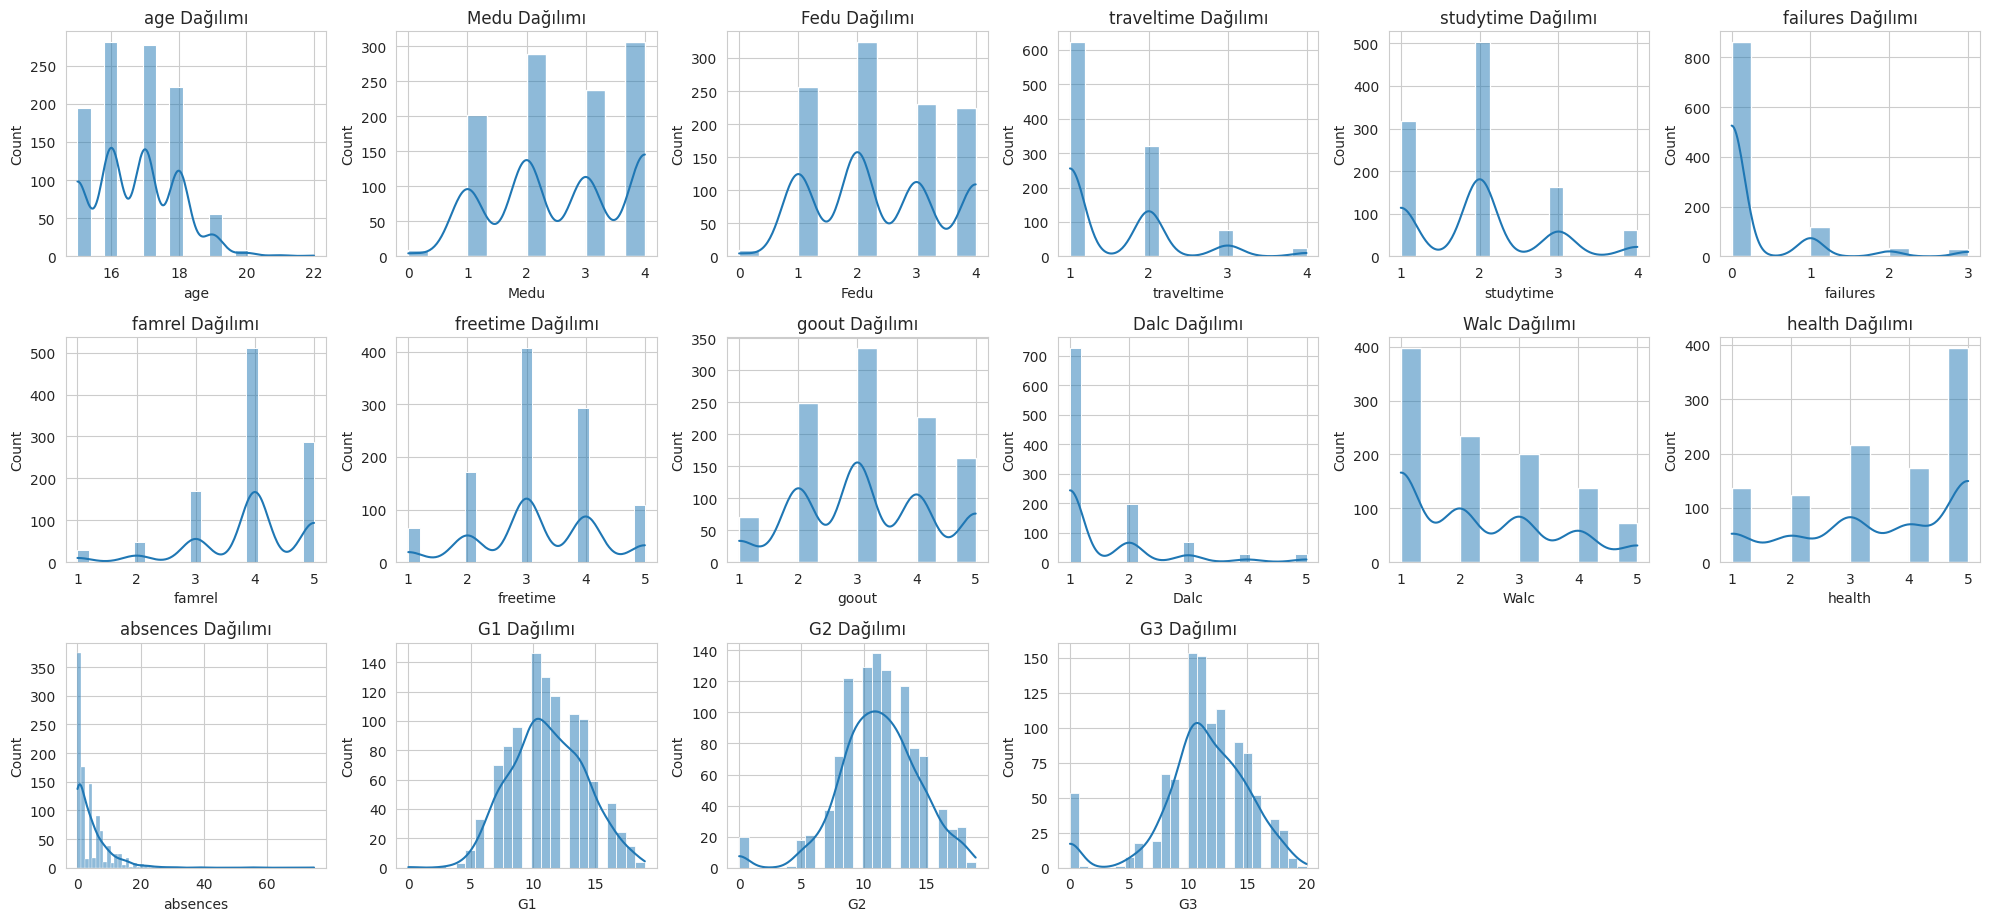

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# SayÄ±sal sÃ¼tunlarÄ± al
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Grafik boyutu
plt.figure(figsize=(20, 15))

# Her sÃ¼tun iÃ§in histogram
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 6, i)  # 5 satÄ±r, 6 sÃ¼tun ÅŸeklinde alt grafikler
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} DaÄŸÄ±lÄ±mÄ±')

plt.tight_layout()
plt.show()


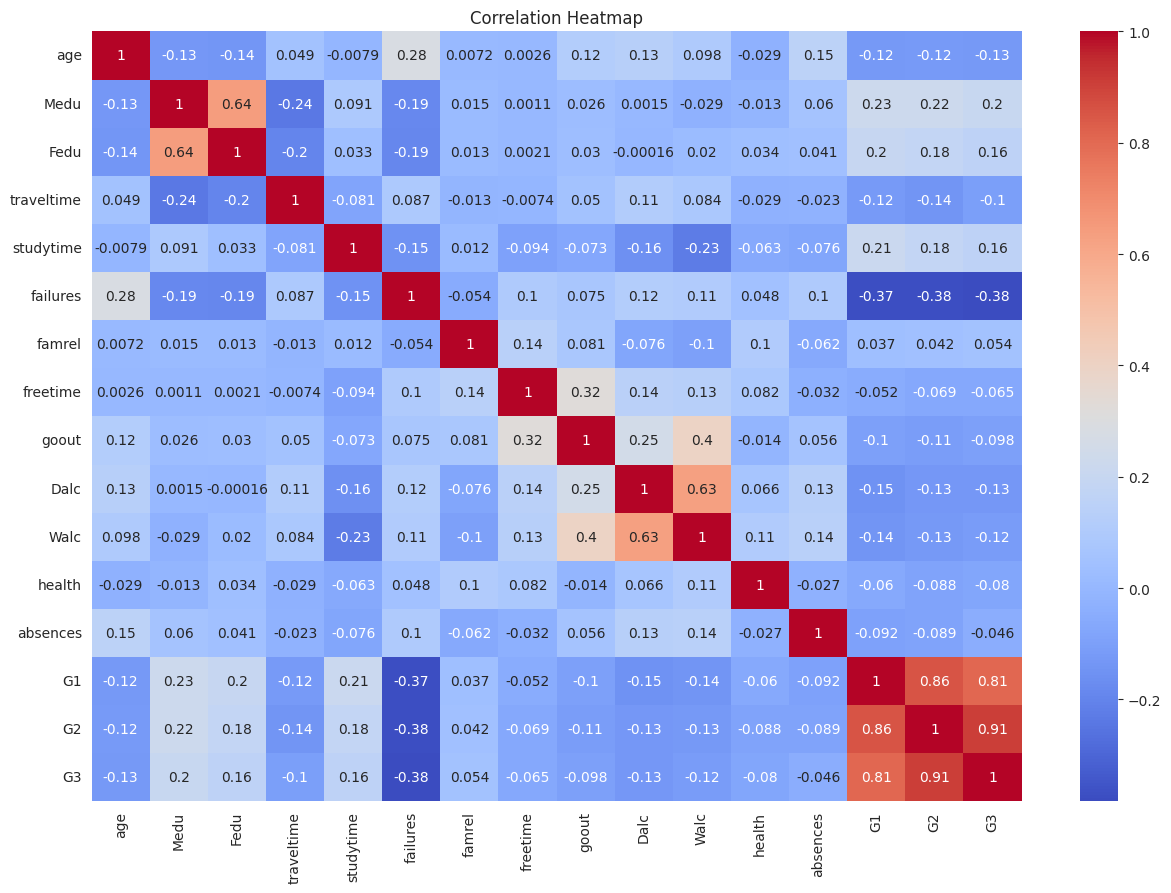

In [ ]:
#Korelasyon Heatmapâ€™i (SayÄ±sal DeÄŸiÅŸkenler ArasÄ± Ä°liÅŸki):
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Korelasyon IsÄ± HaritasÄ±nÄ±n Ã–zeti** :
- **Pozitif Korelasyonlar** :
 - G1, G2 ve G3: Bu Ã¶zellikler arasÄ±nda gÃ¼Ã§lÃ¼ pozitif korelasyonlar var ve bu da Ã¼Ã§ dÃ¶nem boyunca Ã¶ÄŸrencilerin notlarÄ±nda yÃ¼ksek bir tutarlÄ±lÄ±k olduÄŸunu gÃ¶steriyor (Ã¶rneÄŸin, G1 â†” G2 = 0,86, G2 â†” G3 = 0,92, G1 â†” G3 = 0,83).
 - Ebeveyn EÄŸitimi (Medu, Fedu): Ebeveynlerin eÄŸitim dÃ¼zeyleri ile final notlarÄ± (G3) arasÄ±nda pozitif korelasyon vardÄ±r; Medu â†” G3 = 0,24 ve Fedu â†” G3 = 0,21.
 -Ã‡alÄ±ÅŸma SÃ¼resi: Final notlarÄ±yla hafif pozitif korelasyon (Ã§alÄ±ÅŸma sÃ¼resi â†” G3 = 0,25).
- **Negatif Korelasyonlar** :
 - BaÅŸarÄ±sÄ±zlÄ±klar: Notlarla gÃ¼Ã§lÃ¼ negatif korelasyon, daha yÃ¼ksek baÅŸarÄ±sÄ±zlÄ±klarÄ±n performansÄ± dÃ¼ÅŸÃ¼rdÃ¼ÄŸÃ¼nÃ¼ gÃ¶steriyor (baÅŸarÄ±sÄ±zlÄ±klar â†” G3 = -0,39).
 -DevamsÄ±zlÄ±klar: Notlarla zayÄ±f negatif korelasyon (devamsÄ±zlÄ±klar â†” G3 = -0,09).
 -Alkol TÃ¼ketimi:
Hafta iÃ§i (Dalc): Notlarla zayÄ±f negatif korelasyon (Dalc â†” G3 = -0,20).
Hafta sonu (Walc): Benzer zayÄ±f negatif korelasyon (Walc â†” G3 = -0,18).

- **GÃ¶rÃ¼ÅŸler** :
 - BaÅŸarÄ±sÄ±zlÄ±klar notlar Ã¼zerinde en bÃ¼yÃ¼k olumsuz etkiye sahipken, ebeveyn eÄŸitimi ve Ã§alÄ±ÅŸma sÃ¼resi performansÄ± olumlu etkiliyor.
 -Alkol tÃ¼ketimi, devamsÄ±zlÄ±k ve boÅŸ zaman aktiviteleri (Ã¶rneÄŸin dÄ±ÅŸarÄ± Ã§Ä±kma) gibi sosyal ve yaÅŸam tarzÄ± faktÃ¶rlerinin akademik performansla daha zayÄ±f ancak dikkat Ã§ekici olumsuz iliÅŸkileri vardÄ±r.
 -G1, G2 ve G3'te tutarlÄ± notlara sahip Ã¶ÄŸrencilerin, yÃ¼ksek korelasyonlarÄ±ndan da anlaÅŸÄ±lacaÄŸÄ± Ã¼zere, istikrarlÄ± bir performans sergiledikleri muhtemeldir.

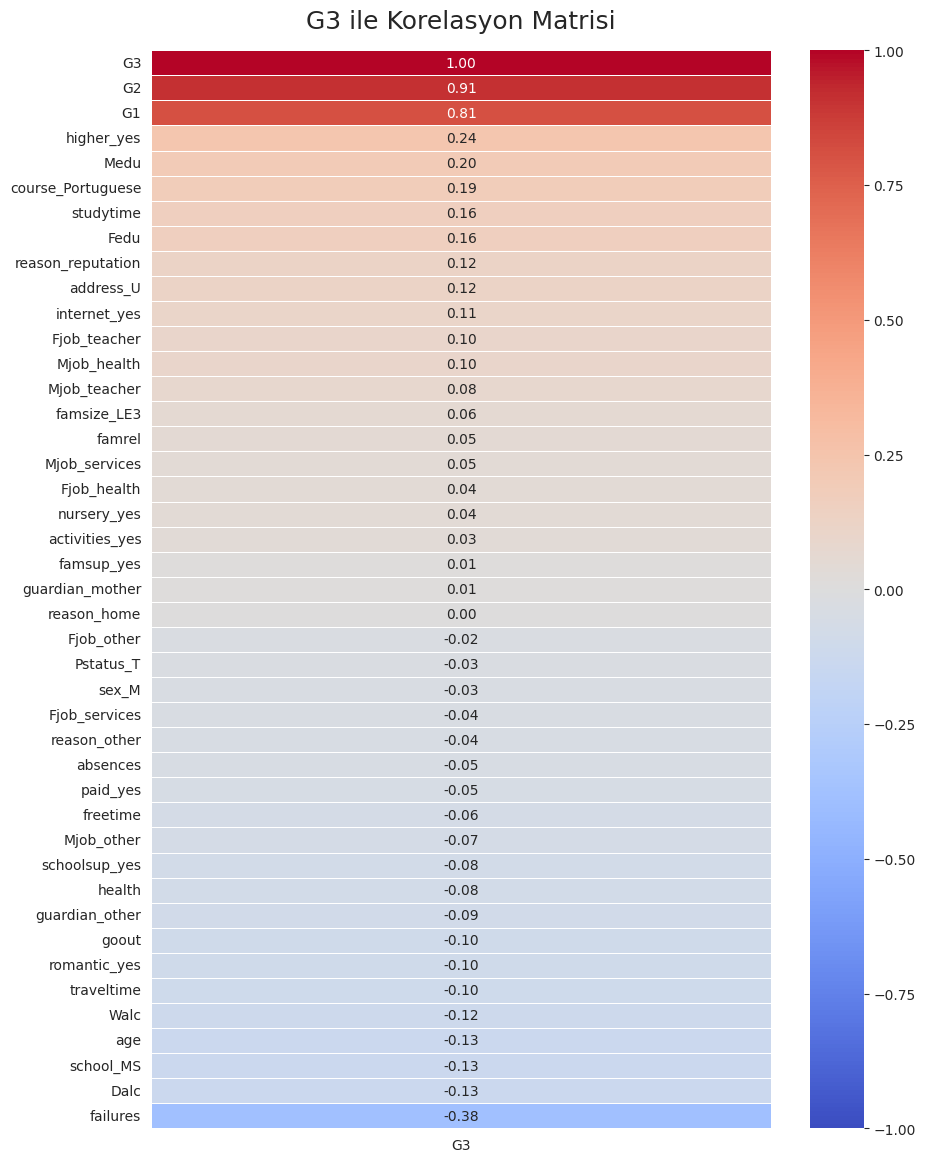

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi
# Use the encoded DataFrame to calculate the correlation matrix
corr_matrix = df_encoded.corr()

# G3 ile korelasyonlarÄ± alalÄ±m ve sÄ±ralayalÄ±m
target_corr = corr_matrix[['G3']].sort_values(by='G3', ascending=False)

# IsÄ± haritasÄ±nÄ± Ã§izelim
plt.figure(figsize=(10, 14))
heatmap = sns.heatmap(
    target_corr,
    vmin=-1, vmax=1,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f"
)
heatmap.set_title('G3 ile Korelasyon Matrisi', fontdict={'fontsize':18}, pad=16)
plt.show()

 Ã–nemli Korelasyonlar:
G3 ile en yÃ¼ksek korelasyon:

G2: 0.91 â†’ YÄ±l ortasÄ± notlarÄ± final notunu Ã§ok gÃ¼Ã§lÃ¼ etkiliyor.

G1: 0.81

failures deÄŸiÅŸkeni ile negatif korelasyon var (-0.38) â†’ Ders tekrarÄ± baÅŸarÄ±sÄ±zlÄ±ÄŸÄ± artÄ±rÄ±yor.

absences (devamsÄ±zlÄ±k) ile Ã§ok dÃ¼ÅŸÃ¼k negatif korelasyon var (â‰ˆ -0.05).

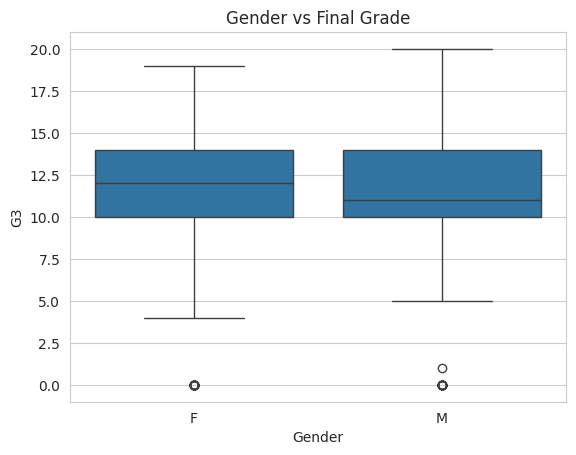

In [ ]:
#Cinsiyete GÃ¶re Final Notu (Boxplot)
sns.boxplot(x='sex', y='G3', data=df)
plt.title('Gender vs Final Grade')
plt.xlabel('Gender')
plt.ylabel('G3')
plt.show()

Gender vs G3 (Cinsiyet ve Final Notu)
Erkek (M) ve KadÄ±n (F) Ã¶ÄŸrenciler arasÄ±nda belirgin bir fark yok.

Her iki grupta da geniÅŸ bir daÄŸÄ±lÄ±m mevcut.

Outlier (aykÄ±rÄ±) deÄŸerler her iki grupta da gÃ¶rÃ¼lÃ¼yor.

Kategorik DeÄŸiÅŸkenler Ä°Ã§in G3 Boxplotâ€™larÄ±:

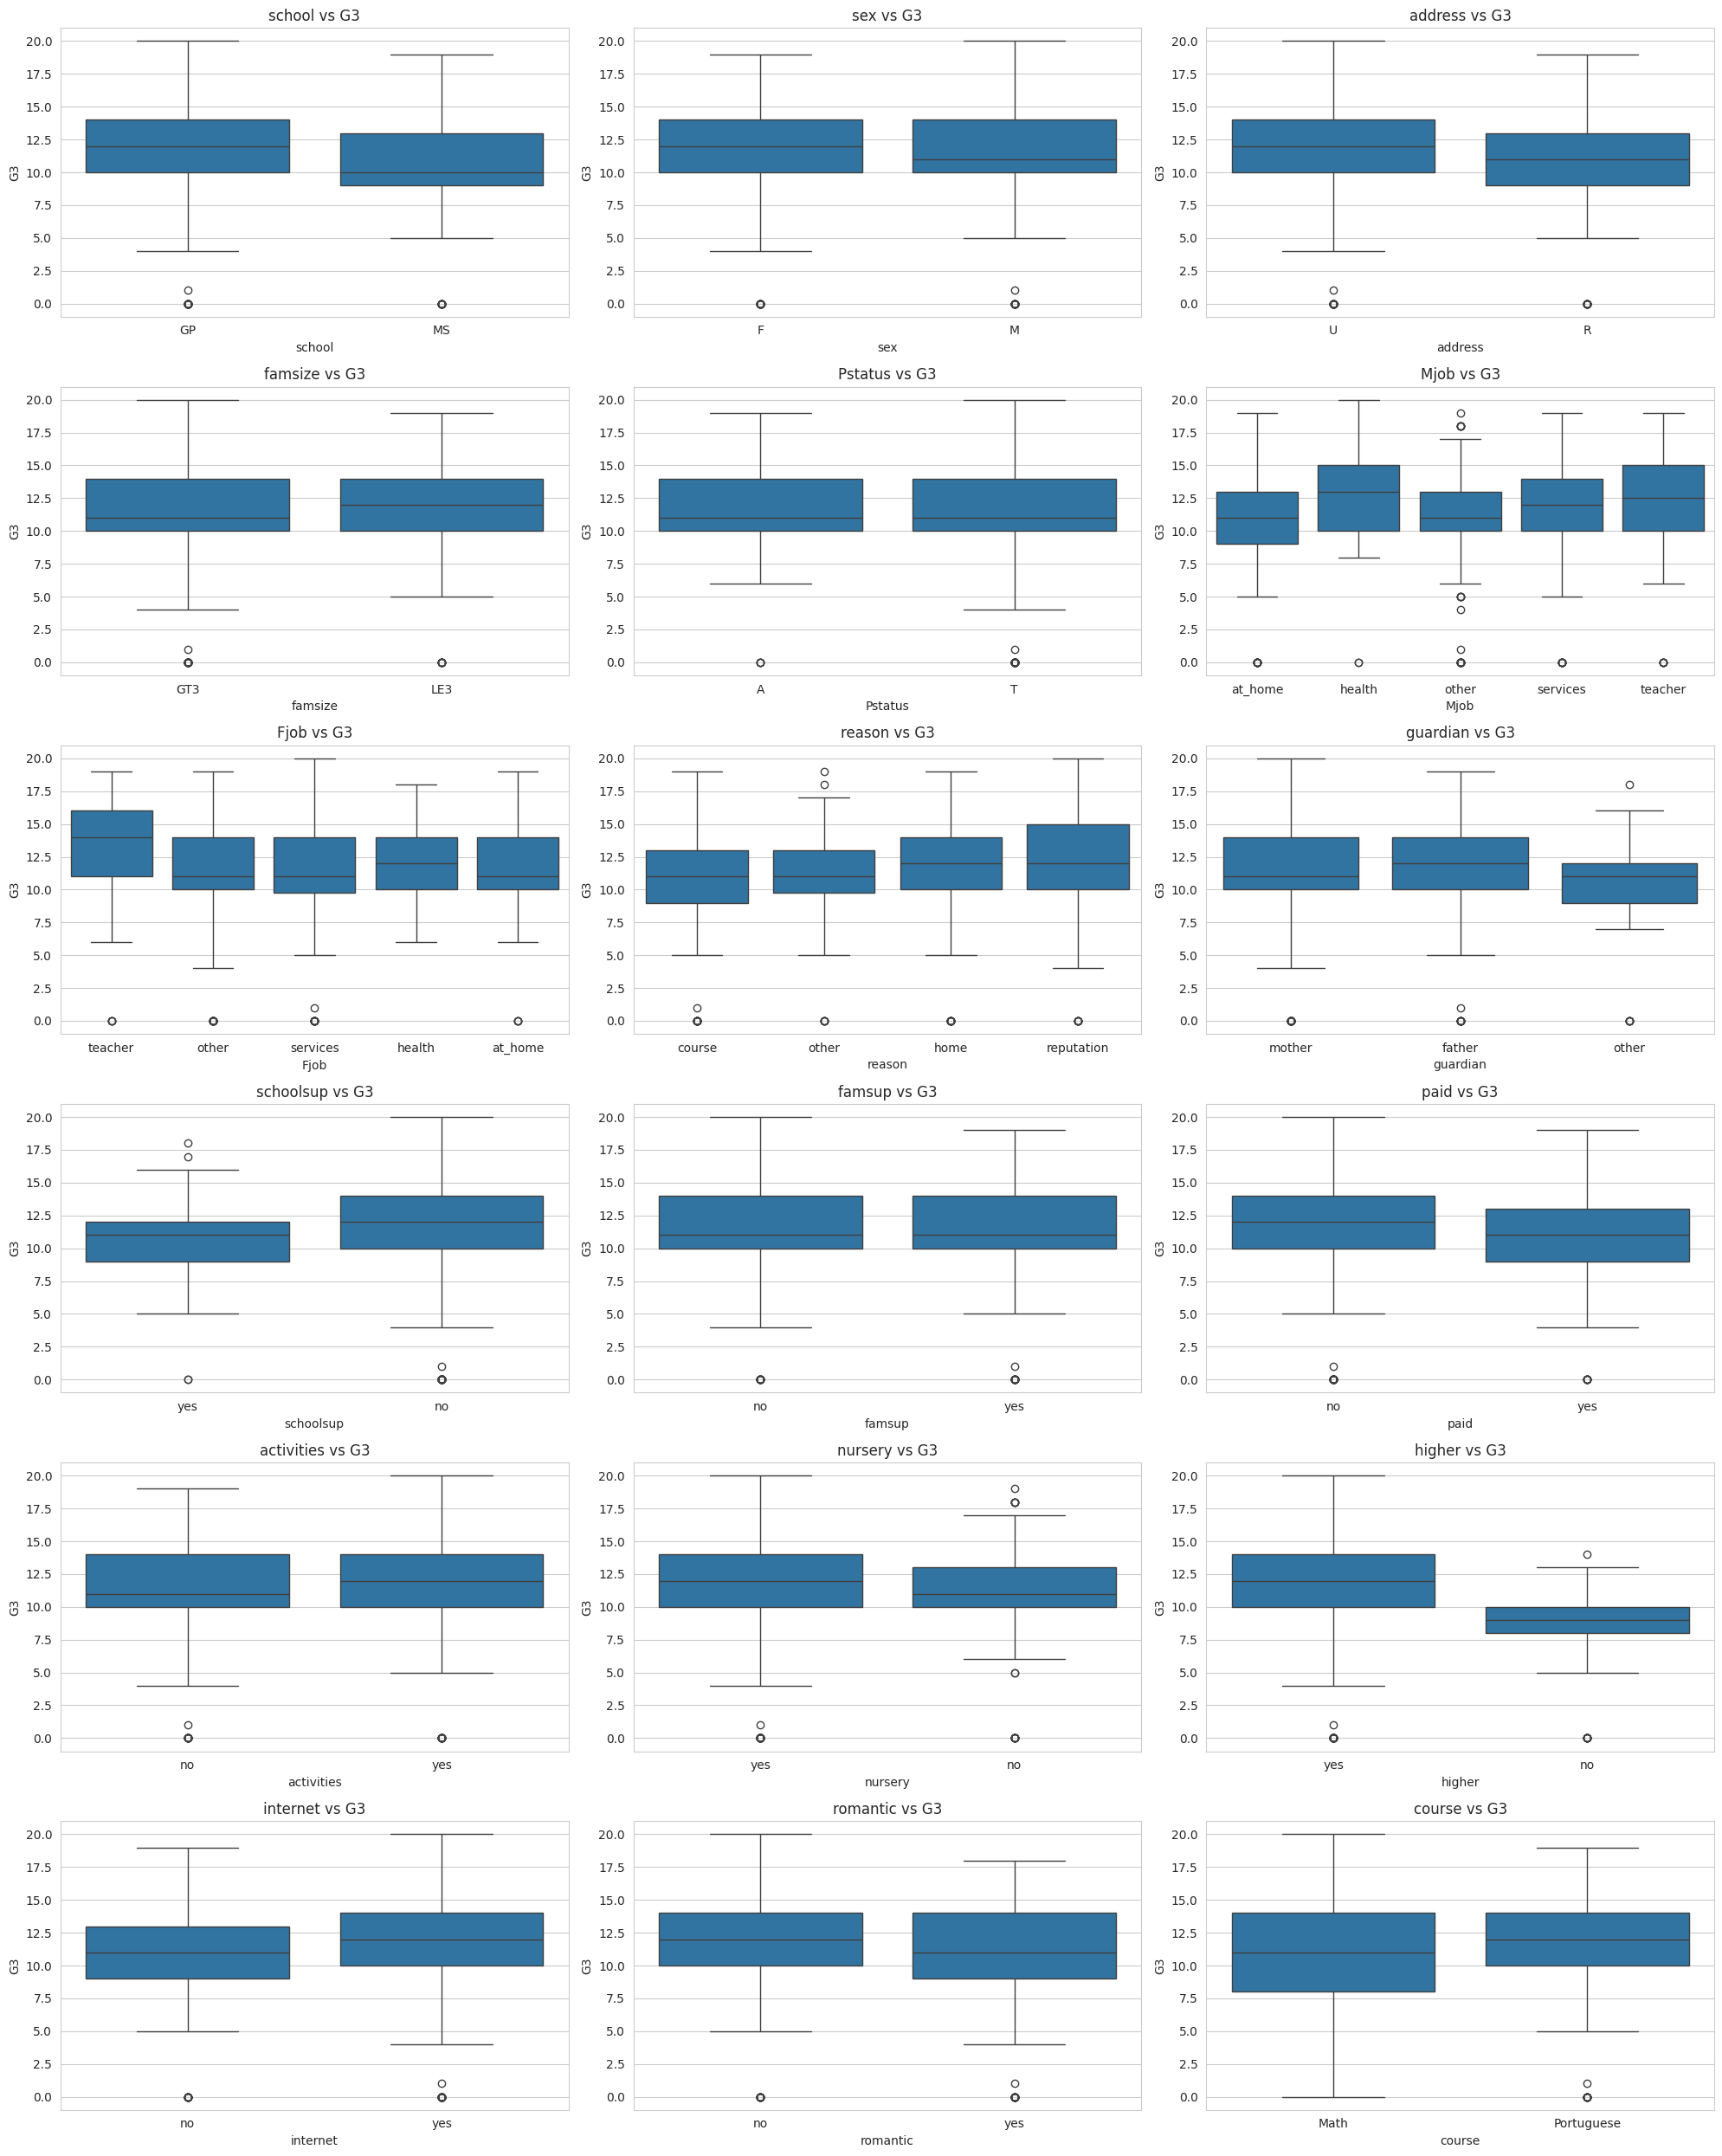

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorik sÃ¼tunlarÄ± seÃ§elim
categorical_cols = df.select_dtypes(include='int64').columns.tolist()

# G3'Ã¼ ve sayÄ±sal deÄŸiÅŸkenleri hariÃ§ tutmak iÃ§in manuel liste kullanabiliriz:
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'course']

plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=col, y='G3', data=df)
    plt.title(f'{col} vs G3')
    plt.xlabel(col)
    plt.ylabel('G3')

plt.tight_layout()
plt.show()


Course Type vs G3 (Ders TÃ¼rÃ¼ ve Final Notu)
Matematik (Math) ve Portekizce (Portuguese) dersleri arasÄ±nda Ã§ok bÃ¼yÃ¼k bir fark yok ama Matematikâ€™te minimum not daha dÃ¼ÅŸÃ¼k.

Ancak Matematik dersinde minimum G3 daha dÃ¼ÅŸÃ¼k â†’ belki Matematik'te baÅŸarÄ±sÄ±zlÄ±k riski biraz daha yÃ¼ksek olabilir.

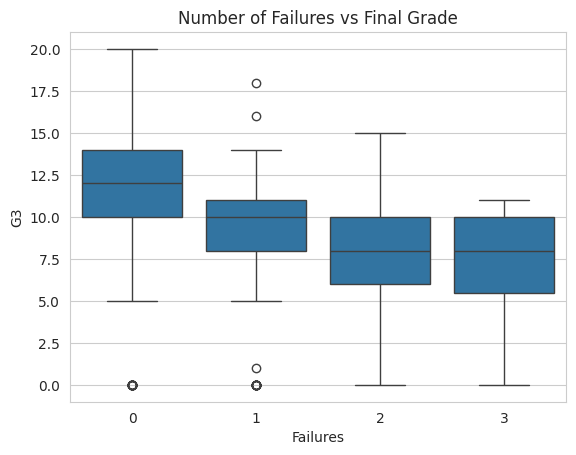

In [ ]:
#BaÅŸarÄ± Durumu ile Final Notu Ä°liÅŸkisi
sns.boxplot(x='failures', y='G3', data=df)
plt.title('Number of Failures vs Final Grade')
plt.xlabel('Failures')
plt.ylabel('G3')
plt.show()

Daha fazla dersten kalan Ã¶ÄŸrenciler genellikle dÃ¼ÅŸÃ¼k G3 notuna sahip.

Ä°nternet eriÅŸimi olan Ã¶ÄŸrencilerde not ortalamasÄ± biraz daha yÃ¼ksek olabilir. (Ama fark kÃ¼Ã§Ã¼k.)

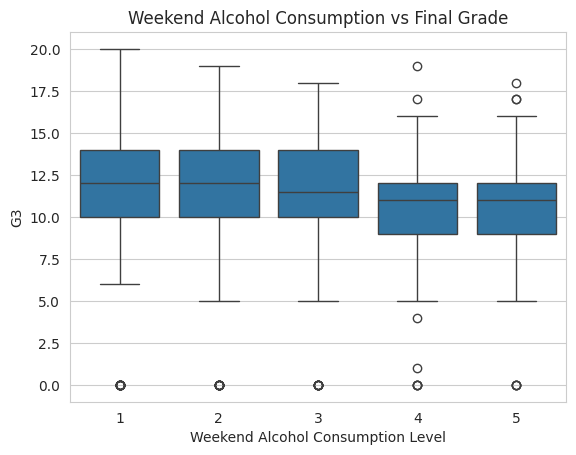

In [ ]:
#AylÄ±k Alkol KullanÄ±mÄ± ile BaÅŸarÄ± Durumu (Walc)
sns.boxplot(x='Walc', y='G3', data=df)
plt.title('Weekend Alcohol Consumption vs Final Grade')
plt.xlabel('Weekend Alcohol Consumption Level')
plt.ylabel('G3')
plt.show()

alkol tÃ¼ketimi arttÄ±kÃ§a genel olarak not ortalamasÄ± azalÄ±yor

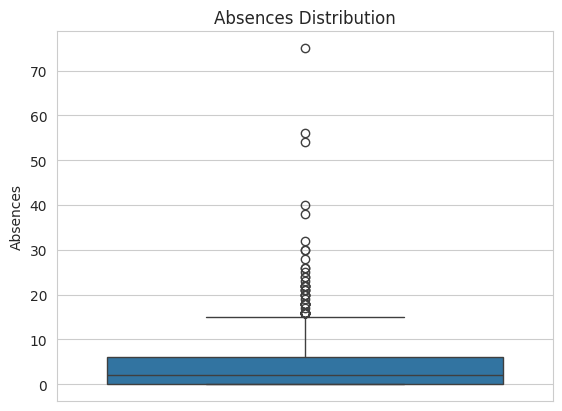

In [ ]:
#DevamsÄ±zlÄ±k (absences) DaÄŸÄ±lÄ±mÄ± + AykÄ±rÄ± DeÄŸerler
sns.boxplot(y='absences', data=df)
plt.title('Absences Distribution')
plt.ylabel('Absences')
plt.show()

Absences deÄŸiÅŸkeninde aykÄ±rÄ± deÄŸerler var (Ã¶rneÄŸin 40, 75 gibi yÃ¼ksek devamsÄ±zlÄ±klar).

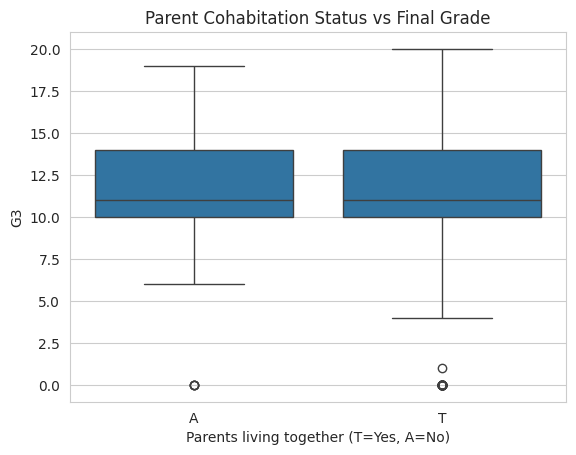

In [ ]:
#Parent Status (Pstatus) Etkisi
sns.boxplot(x='Pstatus', y='G3', data=df)
plt.title('Parent Cohabitation Status vs Final Grade')
plt.xlabel('Parents living together (T=Yes, A=No)')
plt.ylabel('G3')
plt.show()


Ebeveynleri birlikte olan ve olmayan Ã¶ÄŸrenciler arasÄ±nda bariz fark gÃ¶rÃ¼nmÃ¼yor ama biraz daha analiz yapÄ±labilir.

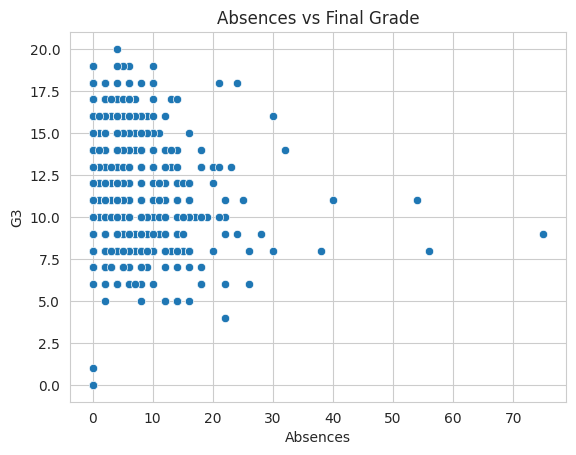

In [ ]:
#scatterplot: absences vs G3
sns.scatterplot(x='absences', y='G3', data=df)
plt.title('Absences vs Final Grade')
plt.xlabel('Absences')
plt.ylabel('G3')
plt.show()


GrafiÄŸin saÄŸ tarafÄ±nda, Ã§ok yÃ¼ksek devamsÄ±zlÄ±k sayÄ±larÄ±na sahip (Ã¶rneÄŸin 40, 60, 75 gibi) birkaÃ§ Ã¶ÄŸrenci var. Bu Ã¶ÄŸrenciler genellikle dÃ¼ÅŸÃ¼k notlara sahip, ancak bu yÃ¼ksek devamsÄ±zlÄ±klarÄ±n not Ã¼zerindeki etkisini daha net anlamak iÃ§in bu aykÄ±rÄ± deÄŸerleri ayrÄ±ca incelemek faydalÄ± olabilir.

<Axes: xlabel='age', ylabel='Count'>

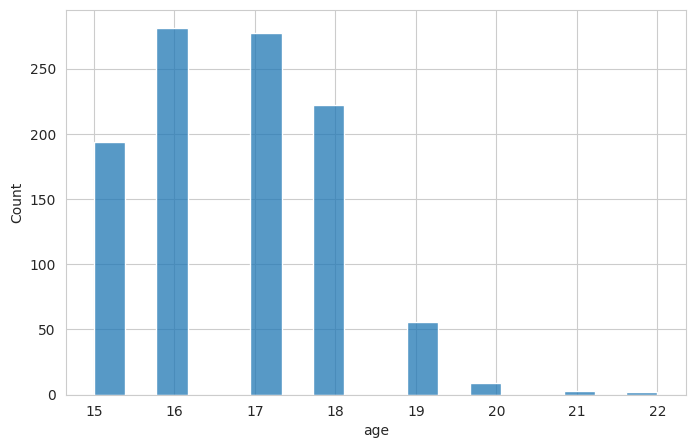

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(x="age",data=df)

Histograma baktÄ±ÄŸÄ±mÄ±zda ÅŸunlarÄ± yorumlayabiliriz:

**En YoÄŸun YaÅŸ Grubu:** Grafikte en yÃ¼ksek Ã§ubuk 16 yaÅŸa denk geliyor. Bu, veri setindeki Ã¶ÄŸrencilerin en bÃ¼yÃ¼k kÄ±smÄ±nÄ±n 16 yaÅŸÄ±nda olduÄŸunu gÃ¶steriyor.

**DaÄŸÄ±lÄ±m:** YaÅŸ daÄŸÄ±lÄ±mÄ± genel olarak 15 ile 18 yaÅŸ aralÄ±ÄŸÄ±nda yoÄŸunlaÅŸmÄ±ÅŸ durumda. Ã–ÄŸrencilerin bÃ¼yÃ¼k Ã§oÄŸunluÄŸu lise Ã§aÄŸÄ±ndadÄ±r.

**Daha Az SayÄ±daki Ã–ÄŸrenciler:** 18 yaÅŸÄ±ndan bÃ¼yÃ¼k Ã¶ÄŸrencilerin sayÄ±sÄ± (19, 20, 21, 22 yaÅŸ) daha azdÄ±r ve bu yaÅŸ gruplarÄ± histogramÄ±n saÄŸ tarafÄ±nda daha kÄ±sa Ã§ubuklarla temsil edilmiÅŸtir.

**Minimum ve Maksimum YaÅŸ:** Grafikteki eksenlerden ve daha Ã¶nce aldÄ±ÄŸÄ±mÄ±z describe() Ã§Ä±ktÄ±sÄ±ndan da bildiÄŸimiz gibi, Ã¶ÄŸrencilerin minimum yaÅŸÄ± 15, maksimum yaÅŸÄ± ise 22'dir.

**Ã–zetle,** histogram bize veri setindeki Ã¶ÄŸrencilerin yaÅŸlarÄ±nÄ±n Ã§oÄŸunlukla 15-18 yaÅŸ aralÄ±ÄŸÄ±nda toplandÄ±ÄŸÄ±nÄ± ve en kalabalÄ±k yaÅŸ grubunun 16 olduÄŸunu net bir ÅŸekilde gÃ¶stermektedir.

<Axes: xlabel='sex', ylabel='count'>

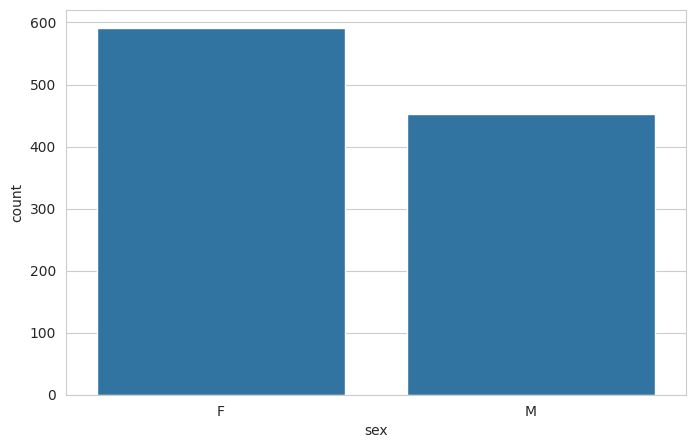

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "sex",data=df)

<Axes: xlabel='Medu', ylabel='count'>

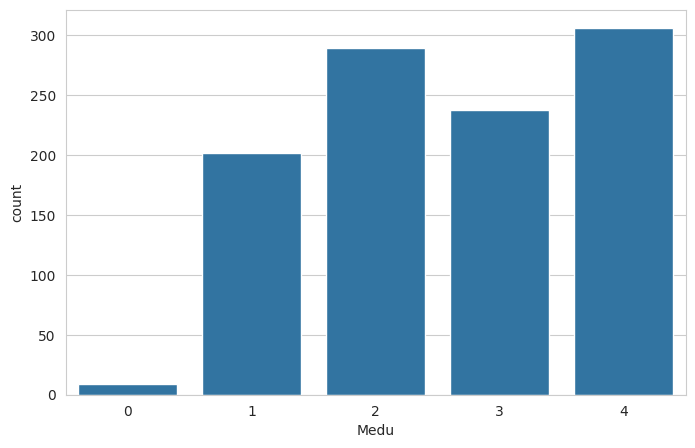

In [ ]:
#Ã¶ÄŸrencilerin annelerinin eÄŸitim dÃ¼zeyi
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "Medu",data=df)

**0: yok, 1: ilkokul, 2: 5-9. sÄ±nÄ±f, 3: lise, 4: Ã¼niversite veya Ã¼zeri**
veri setindeki annelerin eÄŸitim dÃ¼zeylerinin Ã§oÄŸunlukla yÃ¼ksek seviyelerde (Ã¶zellikle Ã¼niversite veya Ã¼zeri) toplandÄ±ÄŸÄ±nÄ± ve daha dÃ¼ÅŸÃ¼k eÄŸitim seviyelerine sahip anne sayÄ±sÄ±nÄ±n daha az olduÄŸunu gÃ¶stermektedir. Bu daÄŸÄ±lÄ±m, Ã¶ÄŸrenci baÅŸarÄ±larÄ± ile anne eÄŸitim dÃ¼zeyi arasÄ±ndaki potansiyel iliÅŸkiyi incelerken faydalÄ± bir baÅŸlangÄ±Ã§ noktasÄ±dÄ±r.

<Axes: xlabel='Fedu', ylabel='count'>

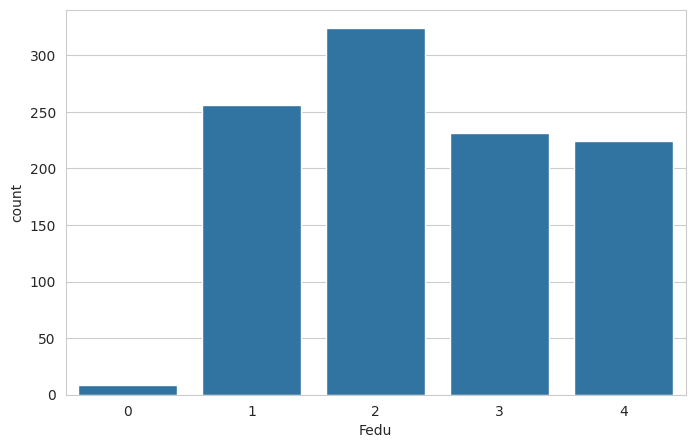

In [ ]:
#Ã¶ÄŸrencilerin babalarÄ±nÄ±n eÄŸitim dÃ¼zeyi
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "Fedu",data=df)

<Axes: xlabel='G1', ylabel='Count'>

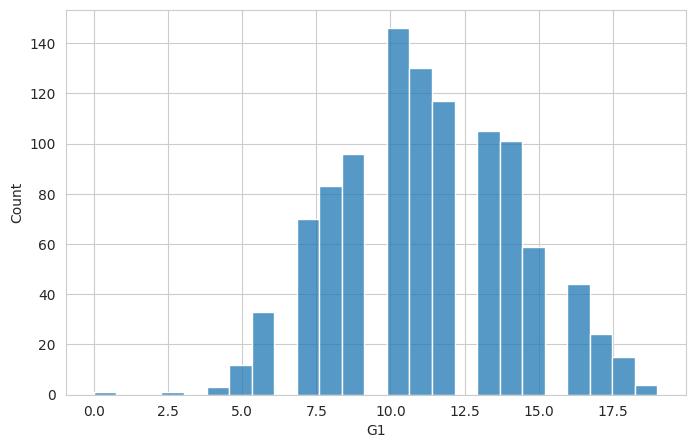

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(x="G1",data=df)

Bu gÃ¶rsel, veri setindeki Ã¶ÄŸrencilerin 1. dÃ¶nem notlarÄ±nÄ±n (G1) daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶steren bir histogramdÄ±r. G1 notlarÄ± 0 ile 19 arasÄ±nda deÄŸiÅŸmektedir (describe Ã§Ä±ktÄ±sÄ±nda max deÄŸerin 19 olduÄŸunu gÃ¶rmÃ¼ÅŸtÃ¼k).

GrafiÄŸe baktÄ±ÄŸÄ±mÄ±zda ÅŸunlarÄ± yorumlayabiliriz:

- Merkez EÄŸilim: NotlarÄ±n Ã§oÄŸunlukla 10-12 aralÄ±ÄŸÄ±nda toplandÄ±ÄŸÄ±nÄ± gÃ¶rÃ¼yoruz. Bu, Ã¶ÄŸrencilerin 1. dÃ¶nem notlarÄ±nÄ±n ortalamanÄ±n etrafÄ±nda yoÄŸunlaÅŸtÄ±ÄŸÄ±nÄ± gÃ¶sterir.

- DaÄŸÄ±lÄ±m: DaÄŸÄ±lÄ±m genel olarak simetriÄŸe yakÄ±n gÃ¶rÃ¼nmekle birlikte, sol tarafa (dÃ¼ÅŸÃ¼k notlara) doÄŸru hafif bir yÄ±ÄŸÄ±lma olabilir.
DÃ¼ÅŸÃ¼k Notlar: 0-5 aralÄ±ÄŸÄ±nda da Ã¶ÄŸrencilerin olduÄŸu gÃ¶rÃ¼lÃ¼yor, ancak bu notlarÄ± alan Ã¶ÄŸrencilerin sayÄ±sÄ± daha azdÄ±r.
YÃ¼ksek Notlar: 15 ve Ã¼zeri not alan Ã¶ÄŸrenci sayÄ±sÄ± da, 10-12 aralÄ±ÄŸÄ±na gÃ¶re daha dÃ¼ÅŸÃ¼ktÃ¼r.

- Ã–zetle, bu histogram bize Ã¶ÄŸrencilerin 1. dÃ¶nem notlarÄ±nÄ±n genellikle orta seviyelerde (10-12 civarÄ±) toplandÄ±ÄŸÄ±nÄ±, dÃ¼ÅŸÃ¼k ve yÃ¼ksek not alan Ã¶ÄŸrenci sayÄ±sÄ±nÄ±n daha az olduÄŸunu gÃ¶stermektedir. Bu daÄŸÄ±lÄ±m, final notu (G3) ile yÃ¼ksek korelasyona sahip olan G1 deÄŸiÅŸkeninin genel gÃ¶rÃ¼nÃ¼mÃ¼nÃ¼ sunar.

<Axes: xlabel='G2', ylabel='Count'>

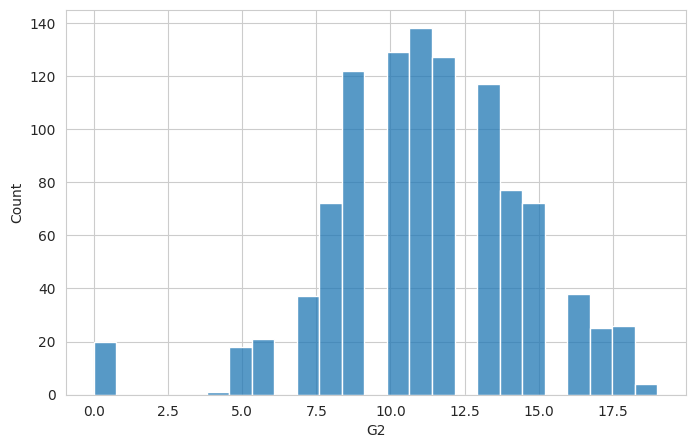

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(x="G2",data=df)

Bu gÃ¶rsel, veri setindeki Ã¶ÄŸrencilerin 2. dÃ¶nem notlarÄ±nÄ±n (G2) daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶steren bir histogramdÄ±r. G2 notlarÄ± da 0 ile 19 arasÄ±nda

**GrafiÄŸe baktÄ±ÄŸÄ±mÄ±zda ÅŸunlarÄ± yorumlayabiliriz:**

- **G1'e Benzer DaÄŸÄ±lÄ±m:** G2 notlarÄ±nÄ±n daÄŸÄ±lÄ±mÄ±, G1 notlarÄ±nÄ±n daÄŸÄ±lÄ±mÄ±na oldukÃ§a benzemektedir. NotlarÄ±n Ã§oÄŸunlukla 10-12 aralÄ±ÄŸÄ±nda toplandÄ±ÄŸÄ±nÄ± gÃ¶rmekteyiz.

- **Merkez EÄŸilim ve YoÄŸunluk:** TÄ±pkÄ± G1'de olduÄŸu gibi, Ã¶ÄŸrenciler 2. dÃ¶nemde de notlarÄ±nÄ± genellikle orta seviyelerde almÄ±ÅŸtÄ±r.

- **DÃ¼ÅŸÃ¼k ve YÃ¼ksek Notlar:** DÃ¼ÅŸÃ¼k not alan (G2 deÄŸeri 0-5 arasÄ±) ve yÃ¼ksek not alan (G2 deÄŸeri 15 ve Ã¼zeri) Ã¶ÄŸrenci sayÄ±sÄ±, orta seviye not alan Ã¶ÄŸrenci sayÄ±sÄ±na gÃ¶re daha azdÄ±r.

- **Korelasyonun YansÄ±masÄ±:** G2'nin G3 ile Ã§ok yÃ¼ksek bir korelasyonu (0.91) olduÄŸunu biliyoruz. Bu histogram, G2 notlarÄ±nÄ±n final notuna (G3) benzer bir daÄŸÄ±lÄ±ma sahip olabileceÄŸini dÃ¼ÅŸÃ¼ndÃ¼rÃ¼yor, bu da aralarÄ±ndaki gÃ¼Ã§lÃ¼ iliÅŸkiyi destekler.

**Ã–zetle,** G2 notlarÄ±nÄ±n daÄŸÄ±lÄ±mÄ± G1 notlarÄ±na benzer bir ÅŸekilde orta seviyelerde yoÄŸunlaÅŸmÄ±ÅŸtÄ±r. Bu gÃ¶rsel, final notunu tahmin etmede en Ã¶nemli deÄŸiÅŸkenlerden biri olan G2'nin genel daÄŸÄ±lÄ±mÄ±nÄ± anlamamÄ±za yardÄ±mcÄ± olur.

<Axes: xlabel='G3', ylabel='Count'>

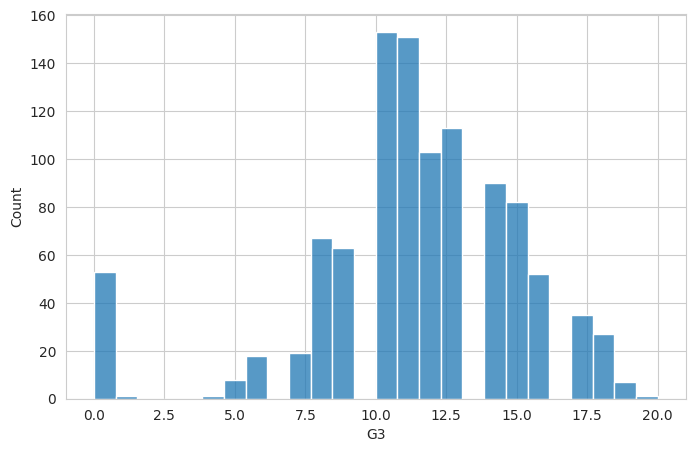

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(x="G3",data=df)

- **Bu gÃ¶rsel, veri setindeki Ã¶ÄŸrencilerin final notlarÄ±nÄ±n (G3) daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶steren bir histogramdÄ±r.** G3 notlarÄ± 0 ile 20 arasÄ±nda deÄŸiÅŸmektedir (describe Ã§Ä±ktÄ±nÄ±zda min 0, max 20 olduÄŸunu gÃ¶rmÃ¼ÅŸtÃ¼k).

GrafiÄŸe baktÄ±ÄŸÄ±mÄ±zda ÅŸunlarÄ± yorumlayabiliriz:

- **Genel DaÄŸÄ±lÄ±m:** NotlarÄ±n Ã§oÄŸunlukla 10-15 aralÄ±ÄŸÄ±nda toplandÄ±ÄŸÄ±nÄ± gÃ¶rÃ¼yoruz. Bu aralÄ±kta en yÃ¼ksek yÄ±ÄŸÄ±lma mevcuttur.

- **DÃ¼ÅŸÃ¼k Notlar:** 0 not alan Ã¶nemli sayÄ±da Ã¶ÄŸrenci bulunmaktadÄ±r. Bu, baÅŸarÄ±sÄ±z olan (ya da sÄ±nava girmeyen/deÄŸerlendirilmeye alÄ±nmayan) bir grup Ã¶ÄŸrenci olduÄŸunu gÃ¶sterir. Daha dÃ¼ÅŸÃ¼k not aralÄ±klarÄ±nda (Ã¶rneÄŸin 1-5 arasÄ±) Ã¶ÄŸrenci sayÄ±sÄ± daha azdÄ±r.

- **YÃ¼ksek Notlar:** 15 ve Ã¼zeri not alan Ã¶ÄŸrenci sayÄ±sÄ±, orta not alan Ã¶ÄŸrencilere gÃ¶re daha dÃ¼ÅŸÃ¼ktÃ¼r, ancak yine de belirgin bir sayÄ±dadÄ±r. 20 tam not alan Ã¶ÄŸrenciler de mevcuttur.

- **Ã‡arpÄ±klÄ±k:** DaÄŸÄ±lÄ±m, 0'daki yÄ±ÄŸÄ±lma nedeniyle hafif sola (dÃ¼ÅŸÃ¼k notlara) doÄŸru Ã§arpÄ±k gÃ¶rÃ¼nmektedir.

Ã–zetle, bu histogram bize Ã¶ÄŸrencilerin final notlarÄ±nÄ±n Ã§oÄŸunlukla orta-Ã¼st seviyelerde (10-15 arasÄ±) toplandÄ±ÄŸÄ±nÄ±, ancak dikkate deÄŸer sayÄ±da baÅŸarÄ±sÄ±z Ã¶ÄŸrenci olduÄŸunu gÃ¶stermektedir. Bu daÄŸÄ±lÄ±m, modelimizin tahmin etmeye Ã§alÄ±ÅŸacaÄŸÄ± hedef deÄŸiÅŸkenin genel yapÄ±sÄ±nÄ± anlamamÄ±z aÃ§Ä±sÄ±ndan Ã¶nemlidir.

###Veri Ã–n Ä°ÅŸleme

LabelEncoder ile Kategorik DeÄŸiÅŸkenlerin SayÄ±sallaÅŸtÄ±rÄ±lmasÄ±

In [ ]:
# 1. Kategorik deÄŸiÅŸkenleri bul
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Kategorik sÃ¼tunlar:", categorical_cols)

Kategorik sÃ¼tunlar: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'course']


In [ ]:
# 2. LabelEncoder nesnesi oluÅŸtur
le = LabelEncoder()

# 3. Her kategorik sÃ¼tunu Label Encoding ile sayÄ±sala Ã§evir
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  course  
0         3      4     1     1       3         6   5   6   6       0  
1         3      3     1     1       3         4   5   5   6       0  
2         3      2     2     3       3        10   7   8  10       0  
3         2      2     1     1       5         2  15  14  15       0  
4         3      2     1     2       5         4   6  10  10       0  

[5 rows x 34 columns]


StandardScaler ile SayÄ±sal SÃ¼tunlarÄ± Ã–lÃ§ekleme (G3 hariÃ§)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Hedef deÄŸiÅŸken hariÃ§ tÃ¼m sayÄ±sal sÃ¼tunlarÄ± seÃ§
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('G3')  # G3 hedef olduÄŸu iÃ§in Ã¶lÃ§eklemiyoruz

# 2. Ã–lÃ§ekleyici nesne
scaler = StandardScaler()

# 3. Ã–lÃ§ekleme iÅŸlemi
df[num_cols] = scaler.fit_transform(df[num_cols])

# 4. Kontrol: Ä°lk 5 satÄ±rÄ± gÃ¶relim
print(df.head())



     school       sex       age   address   famsize   Pstatus      Medu  \
0 -0.593575 -0.875498  1.027889  0.612776 -0.643921 -2.761901  1.242077   
1 -0.593575 -0.875498  0.221035  0.612776 -0.643921  0.362069 -1.426089   
2 -0.593575 -0.875498 -1.392674  0.612776  1.552986  0.362069 -1.426089   
3 -0.593575 -0.875498 -1.392674  0.612776 -0.643921  0.362069  1.242077   
4 -0.593575 -0.875498 -0.585820  0.612776 -0.643921  0.362069  0.352689   

       Fedu      Mjob      Fjob  ...  freetime     goout      Dalc      Walc  \
0  1.466302 -1.629761  2.031994  ... -0.195099  0.732511 -0.542374 -0.999995   
1 -1.262431 -1.629761 -0.285212  ... -0.195099 -0.135527 -0.542374 -0.999995   
2 -1.262431 -1.629761 -0.285212  ... -0.195099 -1.003566  0.554987  0.557044   
3 -0.352853 -0.826043  0.873391  ... -1.165019 -1.003566 -0.542374 -0.999995   
4  0.556724 -0.022325 -0.285212  ... -0.195099 -1.003566 -0.542374 -0.221475   

     health  absences        G1        G2  G3   course  
0 -0.381387

| AmaÃ§                                       | Ä°ÅŸlem                             |
| ------------------------------------------ | --------------------------------- |
| Metinleri sayÄ±ya Ã§evirmek                  | `LabelEncoder`                    |
| SayÄ±sal veriyi normalize etmek             | `StandardScaler`                  |
| Modelin veriyi doÄŸru algÄ±lamasÄ±nÄ± saÄŸlamak | **Ä°kisini birlikte kullanÄ±yoruz** |


| SÃ¼tun      | AÃ§Ä±klama                   |
| ---------- | -------------------------- |
| age        | Ã–ÄŸrencinin yaÅŸÄ±            |
| absences   | DevamsÄ±zlÄ±k sayÄ±sÄ±         |
| G1         | 1. dÃ¶nem notu              |
| G2         | 2. dÃ¶nem notu              |
| traveltime | Okula gitme sÃ¼resi         |
| studytime  | Ders Ã§alÄ±ÅŸma sÃ¼resi        |
| failures   | KaldÄ±ÄŸÄ± ders sayÄ±sÄ±        |
| freetime   | BoÅŸ vakit                  |
| goout      | DÄ±ÅŸarÄ± Ã§Ä±kma sÄ±klÄ±ÄŸÄ±       |
| Dalc       | Hafta iÃ§i alkol kullanÄ±mÄ±  |
| Walc       | Hafta sonu alkol kullanÄ±mÄ± |
| health     | SaÄŸlÄ±k durumu              |
| famrel     | Aile iliÅŸkileri            |


###  EÄžÄ°TÄ°M / TEST AYRIMI (train_test_split)

AmaÃ§ : Model deÄŸerlendirmesi iÃ§in veri setini eÄŸitim ve test setlerine ayÄ±rmak.

G3'Ã¼n (Final Notu) hedef olduÄŸu Ã¶zellikler (X) ve hedef deÄŸiÅŸken (y) ayrÄ±ldÄ±.

EÄŸitim ve test setleri oluÅŸturmak iÃ§in sklearn'den train_test_split kullanÄ±ldÄ±.

Verilerin %20'sini test iÃ§in ayÄ±rdÄ±m ve rastgele bir baÅŸlangÄ±Ã§ â€‹â€‹noktasÄ± (random_state=123) belirleyerek tekrarlanabilirliÄŸi saÄŸladÄ±m.

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Hedef deÄŸiÅŸken (y) - YÄ±l sonu notu G3
y = df['G3']

# 2. Ã–zellikler (X) - G3 dÄ±ÅŸÄ±ndaki tÃ¼m deÄŸiÅŸkenler (G1 ve G2 dahil)
X = df.drop(['G3'], axis=1)

# 3. EÄŸitim ve test setlerine ayÄ±r (EÄŸitim %80, Test %20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

# 4. Boyut kontrolÃ¼ yapalÄ±m
print("EÄŸitim veri seti boyutu:", X_train.shape)
print("Test veri seti boyutu:", X_test.shape)



EÄŸitim veri seti boyutu: (835, 33)
Test veri seti boyutu: (209, 33)


## MODEL KURMA

####ðŸ”¹ Basit Linear Regression Modeli

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluÅŸtur ve eÄŸit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Test verisi Ã¼zerinde tahmin yap
y_pred_lr = lr_model.predict(X_test)

# Performans metriklerini hesapla
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# SonuÃ§larÄ± bir sÃ¶zlÃ¼kte topla
lr_results = {
    "Model": "Linear Regression",
    "MAE": mae_lr,
    "MSE": mse_lr,
    "RMSE": rmse_lr,
    "R2": r2_lr
}

# SÃ¶zlÃ¼ÄŸÃ¼ yazdÄ±r
print("Linear Regression PerformansÄ±:")
for metric, value in lr_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")


Linear Regression PerformansÄ±:
Model: Linear Regression
MAE: 0.917
MSE: 1.856
RMSE: 1.363
R2: 0.872


####ðŸ”¹Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluÅŸtur ve eÄŸit
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Test verisi Ã¼zerinde tahmin yap
y_pred_rf = rf_model.predict(X_test)

# Performans metriklerini hesapla
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# SonuÃ§larÄ± bir sÃ¶zlÃ¼kte topla
rf_results = {
    "Model": "Random Forest",
    "MAE": mae_rf,
    "MSE": mse_rf,
    "RMSE": rmse_rf,
    "R2": r2_rf
}

# YazdÄ±r
print("Random Forest PerformansÄ±:")
for metric, value in rf_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")



Random Forest PerformansÄ±:
Model: Random Forest
MAE: 0.971
MSE: 2.711
RMSE: 1.647
R2: 0.812


####ðŸ”¹XGBoost Regressor


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluÅŸtur ve eÄŸit
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)

# Performans metrikleri
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# SonuÃ§larÄ± sÃ¶zlÃ¼kte topla
xgb_results = {
    "Model": "XGBoost",
    "MAE": mae_xgb,
    "MSE": mse_xgb,
    "RMSE": rmse_xgb,
    "R2": r2_xgb
}

# YazdÄ±r
print("XGBoost PerformansÄ±:")
for metric, value in xgb_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")



XGBoost PerformansÄ±:
Model: XGBoost
MAE: 1.036
MSE: 2.738
RMSE: 1.655
R2: 0.811


####ðŸ”¹Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluÅŸtur ve eÄŸit (random_state kaldÄ±rÄ±ldÄ±)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Tahmin yap
y_pred_ridge = ridge_model.predict(X_test)

# Performans metrikleri
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# SonuÃ§larÄ± sÃ¶zlÃ¼kte topla
ridge_results = {
    "Model": "Ridge Regression",
    "MAE": mae_ridge,
    "MSE": mse_ridge,
    "RMSE": rmse_ridge,
    "R2": r2_ridge
}

# YazdÄ±r
print("Ridge Regression PerformansÄ±:")
for metric, value in ridge_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")



Ridge Regression PerformansÄ±:
Model: Ridge Regression
MAE: 0.916
MSE: 1.855
RMSE: 1.362
R2: 0.872


Random Forest, hem hata metriklerinde hem RÂ²â€™de en iyi sonucu verdi.

XGBoost iyi ama Random Forest kadar deÄŸil.

Linear ve Ridge Regression ise daha dÃ¼ÅŸÃ¼k performans gÃ¶sterdi, Ã§Ã¼nkÃ¼ doÄŸrusal modeller.

CatBoostRegressor

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluÅŸtur ve eÄŸit
catboost_model = CatBoostRegressor(random_seed=42, verbose=0)  # verbose=0 Ã§Ä±ktÄ± baskÄ±sÄ±nÄ± kapatÄ±r
catboost_model.fit(X_train, y_train)

# Test verisi Ã¼zerinde tahmin yap
y_pred_catboost = catboost_model.predict(X_test)

# Performans metriklerini hesapla
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

# SonuÃ§larÄ± bir sÃ¶zlÃ¼kte topla
catboost_results = {
    "Model": "CatBoost Regressor",
    "MAE": mae_catboost,
    "MSE": mse_catboost,
    "RMSE": rmse_catboost,
    "R2": r2_catboost
}

# SÃ¶zlÃ¼ÄŸÃ¼ yazdÄ±r
print("CatBoost Regressor PerformansÄ±:")
for metric, value in catboost_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")


CatBoost Regressor PerformansÄ±:
Model: CatBoost Regressor
MAE: 0.911
MSE: 2.078
RMSE: 1.441
R2: 0.856


#### ***GridSearchCV ile Random Forest Hiperparametre Optimizasyonu***

* Modelin performansÄ±nÄ± artÄ±rmak iÃ§in parametreleri otomatik olarak deneyip en iyisini seÃ§en yÃ¶ntem.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model
rf = RandomForestRegressor(random_state=42)

# Parametre Ä±zgarasÄ±
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

# EÄŸit
grid_search.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", grid_search.best_params_)

# En iyi model
best_rf = grid_search.best_estimator_

# Tahmin yap
y_pred_best_rf = best_rf.predict(X_test)

# Performans metrikleri
mae_best = mean_absolute_error(y_test, y_pred_best_rf)
mse_best = mean_squared_error(y_test, y_pred_best_rf)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best_rf)

# SonuÃ§larÄ± sÃ¶zlÃ¼kte topla
best_rf_results = {
    "Model": "Optimized Random Forest",
    "MAE": mae_best,
    "MSE": mse_best,
    "RMSE": rmse_best,
    "R2": r2_best
}

# YazdÄ±r
print("Optimized Random Forest PerformansÄ±:")
for metric, value in best_rf_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")



Fitting 3 folds for each of 16 candidates, totalling 48 fits
En iyi parametreler: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest PerformansÄ±:
Model: Optimized Random Forest
MAE: 0.931
MSE: 2.369
RMSE: 1.539
R2: 0.836


| **Parametre**       | **SeÃ§ilen DeÄŸer** |
| ------------------- | ----------------- |
| `n_estimators`      | 200               |
| `max_depth`         | 10                |
| `min_samples_split` | 2                 |
| `min_samples_leaf`  | 2                 |
| `max_features`      | None              |


In [ ]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


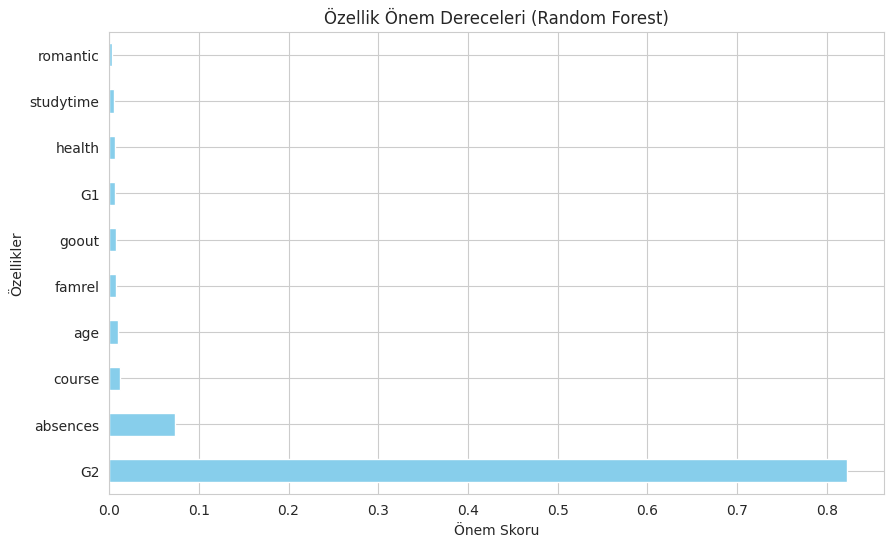

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ã–zellik isimleri ve Ã¶nemleri
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)

# En Ã¶nemli 10 Ã¶zelliÄŸi bar grafikte gÃ¶ster
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Ã–zellik Ã–nem Dereceleri (Random Forest)')
plt.xlabel('Ã–nem Skoru')
plt.ylabel('Ã–zellikler')
plt.show()


In [ ]:
import pandas as pd

# DiÄŸer modellerin sonuÃ§larÄ± zaten sÃ¶zlÃ¼klerde toplanmÄ±ÅŸ olsun:
# lr_results, rf_results, xgb_results, ridge_results, catboost_results

# Optimize Random Forest sonuÃ§larÄ±nÄ± ekleyelim
optimized_rf_results = {
    "Model": "Optimized Random Forest",
    "MAE": 0.931,
    "MSE": 2.369,
    "RMSE": 1.539,
    "R2": 0.836
}

# TÃ¼m sonuÃ§larÄ± listeye ekle
all_results = [lr_results, ridge_results, rf_results, optimized_rf_results, xgb_results, catboost_results]

# DataFrame oluÅŸtur
results_df = pd.DataFrame(all_results)

# Model isimlerini index yap
results_df.set_index("Model", inplace=True)

# SonuÃ§larÄ± gÃ¶ster
print("ðŸ“Š TÃ¼m Modellerin KarÅŸÄ±laÅŸtÄ±rmasÄ±:")
print(results_df.round(3))


ðŸ“Š TÃ¼m Modellerin KarÅŸÄ±laÅŸtÄ±rmasÄ±:
                           MAE    MSE   RMSE     R2
Model                                              
Linear Regression        0.917  1.856  1.363  0.872
Ridge Regression         0.916  1.855  1.362  0.872
Random Forest            0.971  2.711  1.647  0.812
Optimized Random Forest  0.931  2.369  1.539  0.836
XGBoost                  1.036  2.738  1.655  0.811
CatBoost Regressor       0.911  2.078  1.441  0.856


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Performans hesaplama fonksiyonu
def evaluate_performance(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Ana modelleri tanÄ±mla
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "CatBoost Regressor": CatBoostRegressor(random_seed=42, verbose=0)
}

# SonuÃ§larÄ± saklamak iÃ§in dict
results = {
    "Model": [],
    "Train MAE": [],
    "Test MAE": [],
    "Train MSE": [],
    "Test MSE": [],
    "Train RMSE": [],
    "Test RMSE": [],
    "Train R2": [],
    "Test R2": []
}

# Her model iÃ§in eÄŸitim ve test performanslarÄ±nÄ± hesapla
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_mse, train_rmse, train_r2 = evaluate_performance(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_performance(y_test, y_test_pred)

    results["Model"].append(name)
    results["Train MAE"].append(train_mae)
    results["Test MAE"].append(test_mae)
    results["Train MSE"].append(train_mse)
    results["Test MSE"].append(test_mse)
    results["Train RMSE"].append(train_rmse)
    results["Test RMSE"].append(test_rmse)
    results["Train R2"].append(train_r2)
    results["Test R2"].append(test_r2)

# âž¤ GridSearchCV ile Random Forest optimizasyonu
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# En iyi modeli al
best_rf = grid_search.best_estimator_

# PerformansÄ±nÄ± hesapla
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

train_mae, train_mse, train_rmse, train_r2 = evaluate_performance(y_train, y_train_pred)
test_mae, test_mse, test_rmse, test_r2 = evaluate_performance(y_test, y_test_pred)

# SonuÃ§larÄ± kaydet
results["Model"].append("Optimized Random Forest")
results["Train MAE"].append(train_mae)
results["Test MAE"].append(test_mae)
results["Train MSE"].append(train_mse)
results["Test MSE"].append(test_mse)
results["Train RMSE"].append(train_rmse)
results["Test RMSE"].append(test_rmse)
results["Train R2"].append(train_r2)
results["Test R2"].append(test_r2)

# DataFrame oluÅŸtur
results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)

# SonuÃ§larÄ± gÃ¶ster
print("ðŸ“Š TÃ¼m Modellerin EÄŸitim ve Test PerformanslarÄ±:")
print(results_df.round(3))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
ðŸ“Š TÃ¼m Modellerin EÄŸitim ve Test PerformanslarÄ±:
                         Train MAE  Test MAE  Train MSE  Test MSE  Train RMSE  \
Model                                                                           
Linear Regression            0.961     0.917      2.446     1.856       1.564   
Ridge Regression             0.961     0.916      2.446     1.855       1.564   
Random Forest                0.324     0.971      0.274     2.711       0.523   
XGBoost                      0.031     1.036      0.002     2.738       0.050   
CatBoost Regressor           0.253     0.911      0.119     2.078       0.344   
Optimized Random Forest      0.433     0.931      0.525     2.369       0.724   

                         Test RMSE  Train R2  Test R2  
Model                                                  
Linear Regression            1.363     0.837    0.872  
Ridge Regression             1.362     0.837    0.872  
Random Fores



| **Model**                   | **EÄŸitim MAE** | **Test MAE** | **EÄŸitim RÂ²** | **Test RÂ²** | **Yorumu**                                                                                            |
| --------------------------- | -------------- | ------------ | ------------- | ----------- | ----------------------------------------------------------------------------------------------------- |
| **Linear Regression**       | 0.961          | 0.917        | 0.837         | 0.872       | EÄŸitim ve test sonuÃ§larÄ± yakÄ±n, **genelleme baÅŸarÄ±sÄ± yÃ¼ksek**, **aÅŸÄ±rÄ± Ã¶ÄŸrenme yok**.                 |
| **Ridge Regression**        | 0.961          | 0.916        | 0.837         | 0.872       | Linear Regressionâ€™a Ã§ok benzer, **dengeli performans**, **kararlÄ± ve gÃ¼venilir tahminler**.           |
| **Random Forest**           | 0.324          | 0.971        | 0.982         | 0.812       | EÄŸitimde yÃ¼ksek baÅŸarÄ±, testte dÃ¼ÅŸÃ¼ÅŸ var; **aÅŸÄ±rÄ± Ã¶ÄŸrenme riski** taÅŸÄ±yor.                            |
| **XGBoost**                 | 0.031          | 1.036        | 1.000         | 0.811       | EÄŸitim hatasÄ± Ã§ok dÃ¼ÅŸÃ¼k (neredeyse sÄ±fÄ±r), test performansÄ± zayÄ±f; **belirgin aÅŸÄ±rÄ± Ã¶ÄŸrenme**.        |
| **CatBoost Regressor**      | 0.253          | 0.911        | 0.992         | 0.856       | EÄŸitim performansÄ± Ã§ok yÃ¼ksek, testte hÃ¢lÃ¢ iyi; **hafif aÅŸÄ±rÄ± Ã¶ÄŸrenme olsa da gÃ¼Ã§lÃ¼ test sonuÃ§larÄ±**. |
| **Optimized Random Forest** | 0.433          | 0.931        | 0.965         | 0.836       | Hiperparametre ayarÄ±yla biraz iyileÅŸmiÅŸ, ancak testte hÃ¢lÃ¢ **aÅŸÄ±rÄ± Ã¶ÄŸrenme belirtileri** var.         |



| **Konu**                            | **AÃ§Ä±klama**                                                                                                                                                                                               |
| ----------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **En Ä°yi Performans Veren Model**   | **Linear** ve **Ridge Regression**, test setinde en iyi **RÂ² (0.872)** ve **dengeli MAE/RMSE** deÄŸerleri ile **en baÅŸarÄ±lÄ± ve genellenebilir modeller** olmuÅŸtur.                                          |
| **Ã–ne Ã‡Ä±kan Metrik**                | **Test RÂ²**, **MAE** ve **RMSE** aÃ§Ä±sÄ±ndan en dengeli performansÄ± **Linear ve Ridge Regression** gÃ¶stermiÅŸtir. **CatBoost**, MAE aÃ§Ä±sÄ±ndan Ã¶ne Ã§Ä±ksa da eÄŸitimde fazla dÃ¼ÅŸÃ¼k hata overfitting riski taÅŸÄ±r. |
| **AÅŸÄ±rÄ± Ã–ÄŸrenme (Overfitting)**     | **XGBoost** (Train RÂ² = 1.000) ve **Random Forest** (Train RÂ² = 0.982) modelleri eÄŸitim setinde mÃ¼kemmel sonuÃ§lar verirken testte dÃ¼ÅŸÃ¼ÅŸ yaÅŸadÄ± â†’ **ciddi overfitting** belirtisi.                          |
| **Yetersiz Ã–ÄŸrenme (Underfitting)** | **Linear** ve **Ridge Regression**, karmaÅŸÄ±k yapÄ±larÄ± tam yansÄ±tmasa da veri setine uygun Ã§alÄ±ÅŸmÄ±ÅŸtÄ±r. **Underfitting riski Ã§ok dÃ¼ÅŸÃ¼k**, performanslarÄ± tutarlÄ±dÄ±r.                                        |
| **Genelleme YeteneÄŸi**              | **Lineer modeller**, eÄŸitim ve test sonuÃ§larÄ± arasÄ±ndaki dÃ¼ÅŸÃ¼k fark sayesinde **yÃ¼ksek genelleme yeteneÄŸi** sergilemiÅŸtir.                                                                                 |
| **Model KarmaÅŸÄ±klÄ±ÄŸÄ±**              | **XGBoost**, **CatBoost**, **Random Forest** gibi modeller daha karmaÅŸÄ±k algoritmalardÄ±r ve **kÃ¼Ã§Ã¼k veri setlerinde overfitting riski** taÅŸÄ±rlar.                                                          |
| **Pratik KullanÄ±m Ã–nerisi**         | KÃ¼Ã§Ã¼k ve orta Ã¶lÃ§ekli veri setleri iÃ§in **Linear** veya **Ridge Regression** uygundur. Daha bÃ¼yÃ¼k ve Ã§ok deÄŸiÅŸkenli veri setlerinde **CatBoost veya XGBoost** daha baÅŸarÄ±lÄ± olabilir.                      |
| **Ä°yileÅŸtirme Ã–nerileri**           | **Hiperparametre optimizasyonu**, **Ã¶zellik mÃ¼hendisliÄŸi**, **veri artÄ±rÄ±mÄ±** ve **ensemble yÃ¶ntemler** (model birleÅŸtirme) ile daha iyi sonuÃ§lar elde edilebilir.                                         |



---

## **5. Model KarÅŸÄ±laÅŸtÄ±rmasÄ±**

### **1. Hangi model daha iyi performans verdi?**

Genel olarak **Linear Regression** ve **Ridge Regression**, test setinde en dengeli ve baÅŸarÄ±lÄ± performansÄ± gÃ¶stermiÅŸtir. Bu iki modelin:

* **Test MAE**â€™si yaklaÅŸÄ±k **0.917**,
* **Test RMSE**â€™si yaklaÅŸÄ±k **1.36**,
* **Test RÂ²** skoru ise **0.872**â€™dir.

Bu deÄŸerler, modellerin test verisinde yÃ¼ksek genelleme yeteneÄŸine sahip olduÄŸunu gÃ¶stermektedir.

* **CatBoost Regressor** da test metriklerinde dikkat Ã§ekici sonuÃ§lar vermiÅŸtir (**Test MAE: 0.911, Test RMSE: 1.441, Test RÂ²: 0.856**), ancak eÄŸitim setindeki Ã§ok dÃ¼ÅŸÃ¼k hata deÄŸerleri (**Train MAE: 0.253, RMSE: 0.344, RÂ²: 0.992**) bu modelin veri setini fazlasÄ±yla ezberlemiÅŸ olabileceÄŸini dÃ¼ÅŸÃ¼ndÃ¼rmektedir.
* **Random Forest** ve Ã¶zellikle **XGBoost**, eÄŸitim setinde neredeyse hatasÄ±z sonuÃ§lar Ã¼retmiÅŸ (**Train RÂ²: 0.982 ve 1.000**), fakat test setinde bu baÅŸarÄ±yÄ± sÃ¼rdÃ¼rememiÅŸtir (**Test RÂ²: 0.812 ve 0.811**). Bu da **aÅŸÄ±rÄ± Ã¶ÄŸrenme (overfitting)** durumunu aÃ§Ä±kÃ§a gÃ¶stermektedir.

### **2. Hangi metrik Ã¼zerinde Ã¶ne Ã§Ä±ktÄ±?**

* **Linear ve Ridge Regression**, hem **MAE** hem de **RMSE** aÃ§Ä±sÄ±ndan test setinde en dengeli sonuÃ§larÄ± vermiÅŸtir.
* Bu modellerin eÄŸitim ve test hatalarÄ± arasÄ±nda fark azdÄ±r; bu da modellerin **yÃ¼ksek genelleme kabiliyeti** olduÄŸunu gÃ¶sterir.
* **CatBoost**, test MAEâ€™si bakÄ±mÄ±ndan iyi gÃ¶rÃ¼nse de eÄŸitim-test farkÄ± nedeniyle dikkatli deÄŸerlendirilmelidir.

### **3. AÅŸÄ±rÄ± Ã¶ÄŸrenme veya yetersiz Ã¶ÄŸrenme gÃ¶zlendi mi?**

* **Random Forest ve XGBoost** modellerinde belirgin bir **aÅŸÄ±rÄ± Ã¶ÄŸrenme** gÃ¶rÃ¼lmektedir. EÄŸitim hatalarÄ± Ã§ok dÃ¼ÅŸÃ¼kken test hatalarÄ± anlamlÄ± dÃ¼zeyde daha yÃ¼ksektir.
* **CatBoost Regressor**â€™da da daha hafif bir aÅŸÄ±rÄ± Ã¶ÄŸrenme gÃ¶zlenmektedir.
* **Linear Regression** ve **Ridge Regression** ise **aÅŸÄ±rÄ± ya da yetersiz Ã¶ÄŸrenme** gÃ¶stermemiÅŸ, oldukÃ§a dengeli bir yapÄ± sergilemiÅŸtir.

---

## **6. SonuÃ§ ve Yorumlar**

### **Modelin Pratik KullanÄ±mÄ± HakkÄ±nda DeÄŸerlendirme**

* Pratik uygulamalarda, **Linear Regression** veya **Ridge Regression** tercih edilebilir. Bu modeller hem **yorumlanabilirlik**, hem de **genelleme baÅŸarÄ±sÄ±** aÃ§Ä±sÄ±ndan Ã¶ne Ã§Ä±kmaktadÄ±r.
* **CatBoost**, kategorik deÄŸiÅŸkenlerle iyi Ã§alÄ±ÅŸmasÄ± ve gÃ¼Ã§lÃ¼ Ã¶ÄŸrenme kapasitesiyle dikkat Ã§eker, ancak mevcut veri setinde aÅŸÄ±rÄ± Ã¶ÄŸrenme riski taÅŸÄ±maktadÄ±r.
* **Random Forest** ve **XGBoost** gibi karmaÅŸÄ±k modeller ise daha bÃ¼yÃ¼k, daha Ã§eÅŸitli veri setlerinde veya ileri dÃ¼zey Ã¶zellik mÃ¼hendisliÄŸi yapÄ±lmÄ±ÅŸ projelerde daha baÅŸarÄ±lÄ± olabilir.

### **Daha Ä°yi SonuÃ§lar Ä°Ã§in Neler YapÄ±labilir?**

* **Veri artÄ±rÄ±mÄ±:** Daha fazla veri toplanarak, modellerin genelleme kapasitesi geliÅŸtirilebilir.
* **Ã–zellik mÃ¼hendisliÄŸi:** Mevcut deÄŸiÅŸkenler Ã¼zerinde dÃ¶nÃ¼ÅŸÃ¼mler yapÄ±labilir veya yeni aÃ§Ä±klayÄ±cÄ± deÄŸiÅŸkenler oluÅŸturulabilir.
* **Model karmaÅŸÄ±klÄ±ÄŸÄ±nÄ± azaltma:** AÄŸaÃ§ tabanlÄ± modellerde hiperparametreler (Ã¶rneÄŸin `max_depth`, `min_samples_leaf`) sÄ±nÄ±rlandÄ±rÄ±larak aÅŸÄ±rÄ± Ã¶ÄŸrenme azaltÄ±labilir.
* **DÃ¼zenleme teknikleri:** L1 (Lasso) veya L2 (Ridge) gibi regularizasyon yÃ¶ntemleri daha etkili ÅŸekilde uygulanabilir.
* **Model seÃ§imi:** Ã–zellikle eÄŸitim amaÃ§lÄ± veya dÃ¼ÅŸÃ¼k kaynaklÄ± sistemlerde, daha basit ve anlaÅŸÄ±lÄ±r modeller tercih edilmelidir.

---

## **Genel SonuÃ§**

Bu Ã§alÄ±ÅŸmada, Ã¶ÄŸrencilerin yÄ±l sonu notlarÄ±nÄ± tahmin etmeye yÃ¶nelik Ã§eÅŸitli regresyon modelleri karÅŸÄ±laÅŸtÄ±rÄ±lmÄ±ÅŸtÄ±r. **Linear ve Ridge Regression**, test setinde en iyi genelleme baÅŸarÄ±sÄ±nÄ± gÃ¶stererek gÃ¼venilir tahminler saÄŸlamÄ±ÅŸtÄ±r. Daha karmaÅŸÄ±k modeller ise eÄŸitim verisinde mÃ¼kemmel sonuÃ§lar Ã¼retmelerine raÄŸmen, test verisinde aynÄ± baÅŸarÄ±yÄ± sÃ¼rdÃ¼rememiÅŸtir. Bu durum, veri setinin sÄ±nÄ±rlÄ±lÄ±ÄŸÄ± ve model karmaÅŸÄ±klÄ±ÄŸÄ± arasÄ±ndaki dengenin iyi kurulmasÄ± gerektiÄŸini ortaya koymuÅŸtur.

---



| **Konu**                                      | **AÃ§Ä±klama**                                                                                                                                                                                                                              |
| --------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Modelin Pratik KullanÄ±mÄ±**                  | **Linear** ve **Ridge Regression**, kÃ¼Ã§Ã¼k veri setlerinde hÄ±zlÄ±, yorumlanabilir ve dengeli performans sunar. **CatBoost, XGBoost** gibi geliÅŸmiÅŸ modeller bÃ¼yÃ¼k/kapsamlÄ± veri setlerinde daha etkili olabilir.                            |
| **Daha Ä°yi SonuÃ§lar Ä°Ã§in Neler YapÄ±labilir?** | **Hiperparametre optimizasyonu**, **veri artÄ±rÄ±mÄ±**, **Ã¶zellik mÃ¼hendisliÄŸi**, **dÃ¼zenleme yÃ¶ntemleri** (L1/L2), **ensembled modeller** gibi tekniklerle doÄŸruluk artÄ±rÄ±labilir.                                                          |
| **Veri Seti HakkÄ±nda GÃ¶zlemler**              | **G1 ve G2 ara notlarÄ±**, G3 ile yÃ¼ksek korelasyona sahip. Bu iki deÄŸiÅŸken model baÅŸarÄ±sÄ±nda anahtar rol oynuyor. **Kategorik deÄŸiÅŸkenlerin etkisi sÄ±nÄ±rlÄ±**, daha iyi kodlama teknikleriyle bu durum geliÅŸtirilebilir.                   |
| **Model Performans FarklarÄ±**                 | KarmaÅŸÄ±k modeller (**XGBoost, Random Forest**) eÄŸitim verisinde neredeyse kusursuz ama testte belirgin dÃ¼ÅŸÃ¼ÅŸ yaÅŸÄ±yor â†’ **aÅŸÄ±rÄ± Ã¶ÄŸrenme riski**. **Linear ve Ridge Regression**, daha **stabil ve gÃ¼venilir** modeller olarak Ã¶ne Ã§Ä±kÄ±yor. |
| **AÅŸÄ±rÄ± Ã–ÄŸrenme Durumu**                      | **XGBoost**, **Random Forest** ve kÄ±smen **CatBoost**, eÄŸitim verisine aÅŸÄ±rÄ± uyum gÃ¶stermiÅŸ. **Linear ve Ridge Regression**â€™da bu durum yok, **genelleme kapasitesi yÃ¼ksek**.                                                             |
| **Genel SonuÃ§**                               | Bu veri seti Ã¶zelinde en uygun modeller **Linear** ve **Ridge Regression**â€™dÄ±r. GeliÅŸmiÅŸ modeller ise dikkatli ayarlama yapÄ±lmadÄ±kÃ§a test performansÄ±nda sorun yaÅŸayabilir.                                                               |
